#EDA

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset and perform one-hot encoding for the 'bp_category' column.
data_path = "/clean_cardio_data_Tableau.csv"
data = pd.read_csv(data_path)
data.head()

#data = pd.get_dummies(data, columns=['bp_category'], drop_first=True)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal


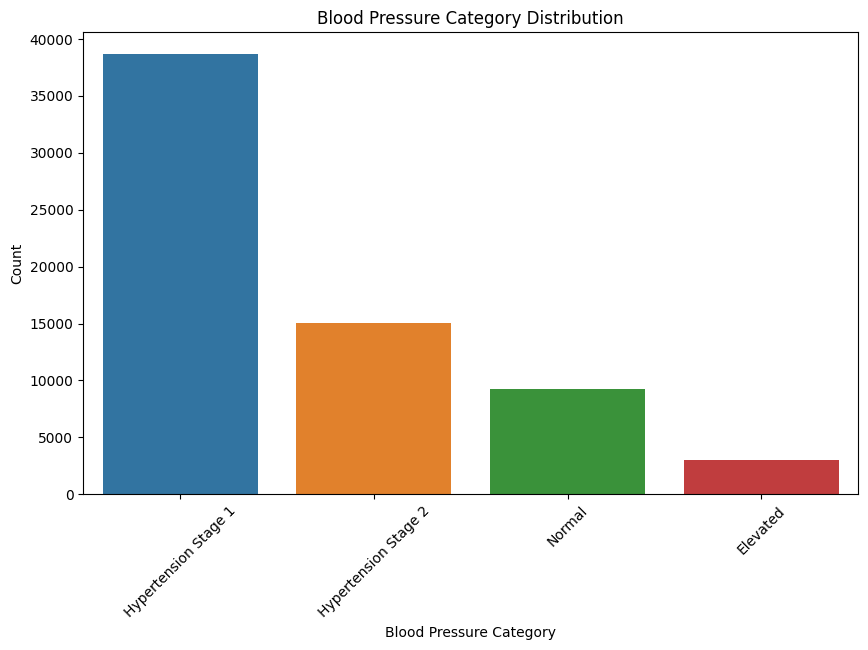

In [ ]:
# Blood Pressure Category Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='bp_category')
plt.title('Blood Pressure Category Distribution')
plt.xlabel('Blood Pressure Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Text(0, 0.5, 'Count')

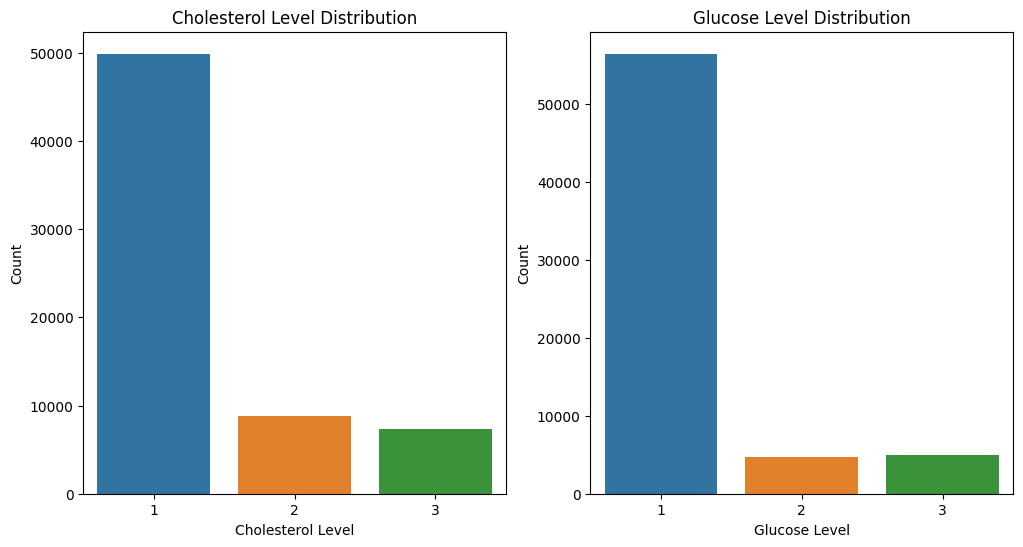

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.countplot(data=data, x='cholesterol', ax=axes[0])
axes[0].set_title('Cholesterol Level Distribution')
axes[0].set_xlabel('Cholesterol Level')
axes[0].set_ylabel('Count')

sns.countplot(data=data, x='gluc', ax=axes[1])
axes[1].set_title('Glucose Level Distribution')
axes[1].set_xlabel('Glucose Level')
axes[1].set_ylabel('Count')

Text(0, 0.5, 'Count')

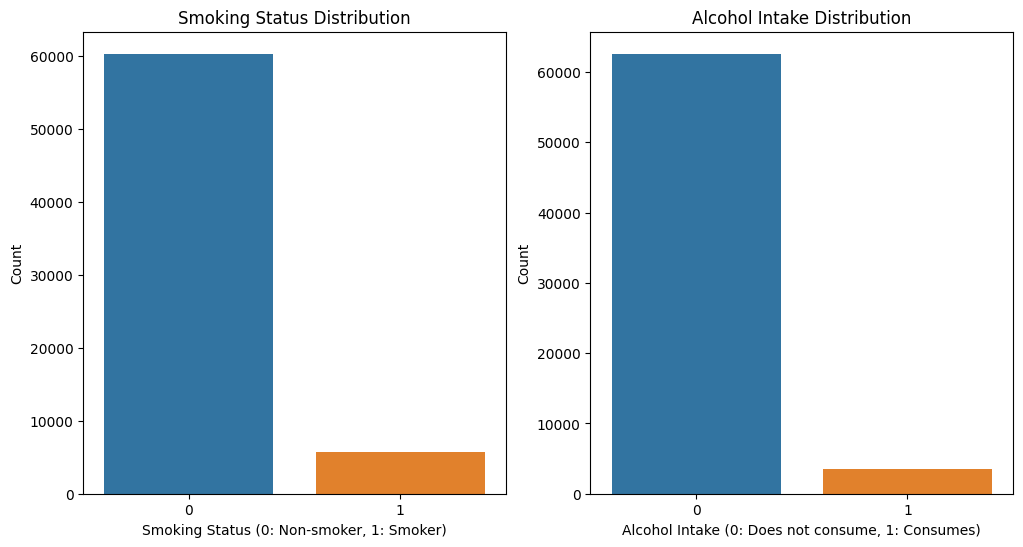

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.countplot(data=data, x='smoke', ax=axes[0])
axes[0].set_title('Smoking Status Distribution')
axes[0].set_xlabel('Smoking Status (0: Non-smoker, 1: Smoker)')
axes[0].set_ylabel('Count')

sns.countplot(data=data, x='alco', ax=axes[1])
axes[1].set_title('Alcohol Intake Distribution')
axes[1].set_xlabel('Alcohol Intake (0: Does not consume, 1: Consumes)')
axes[1].set_ylabel('Count')

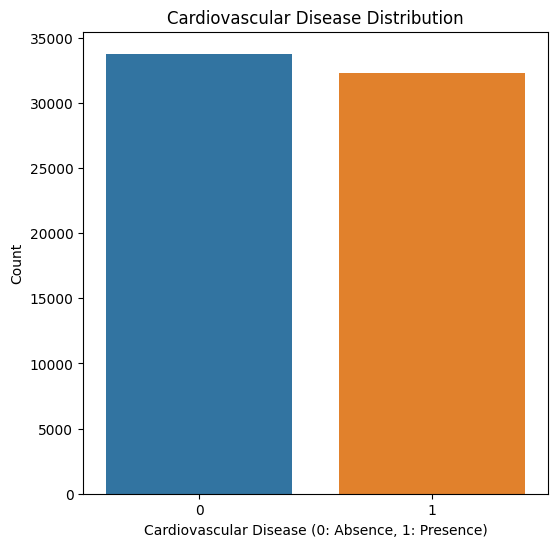

In [ ]:
plt.figure(figsize=(6, 6))
sns.countplot(data=data, x='cardio')
plt.title('Cardiovascular Disease Distribution')
plt.xlabel('Cardiovascular Disease (0: Absence, 1: Presence)')
plt.ylabel('Count')
plt.show()

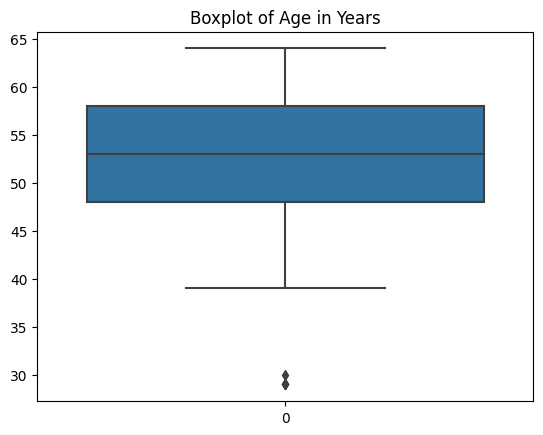

In [ ]:
# Check for missing values
missing_data = data.isnull().sum()
missing_data

# Handling outliers (Example: 'age_years')
sns.boxplot(data['age_years'])
plt.title('Boxplot of Age in Years')
plt.show()

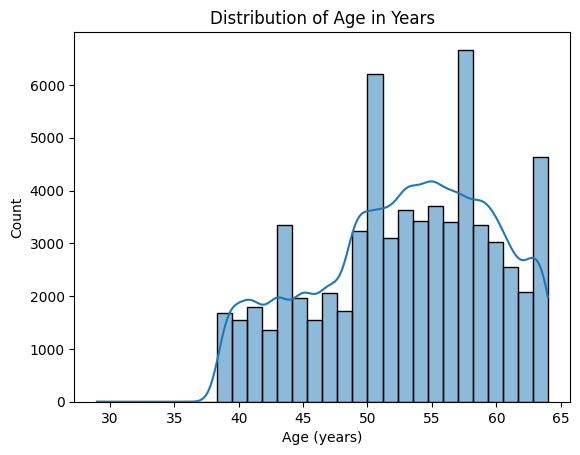

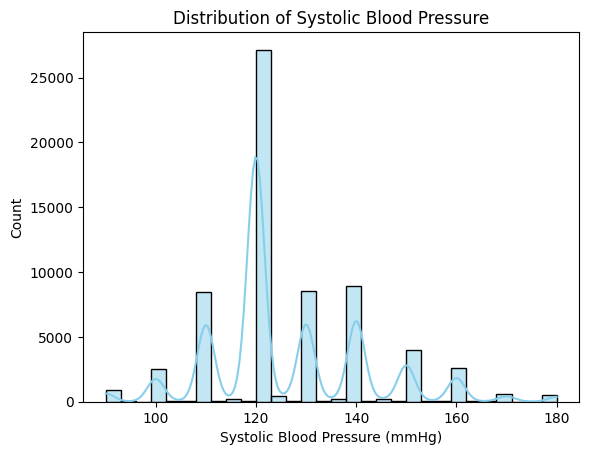

In [ ]:
# Univariate Analysis
sns.histplot(data['age_years'], kde=True, bins=30)
plt.title('Distribution of Age in Years')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.show()

sns.histplot(data['ap_hi'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Systolic Blood Pressure')
plt.xlabel('Systolic Blood Pressure (mmHg)')
plt.ylabel('Count')
plt.show()

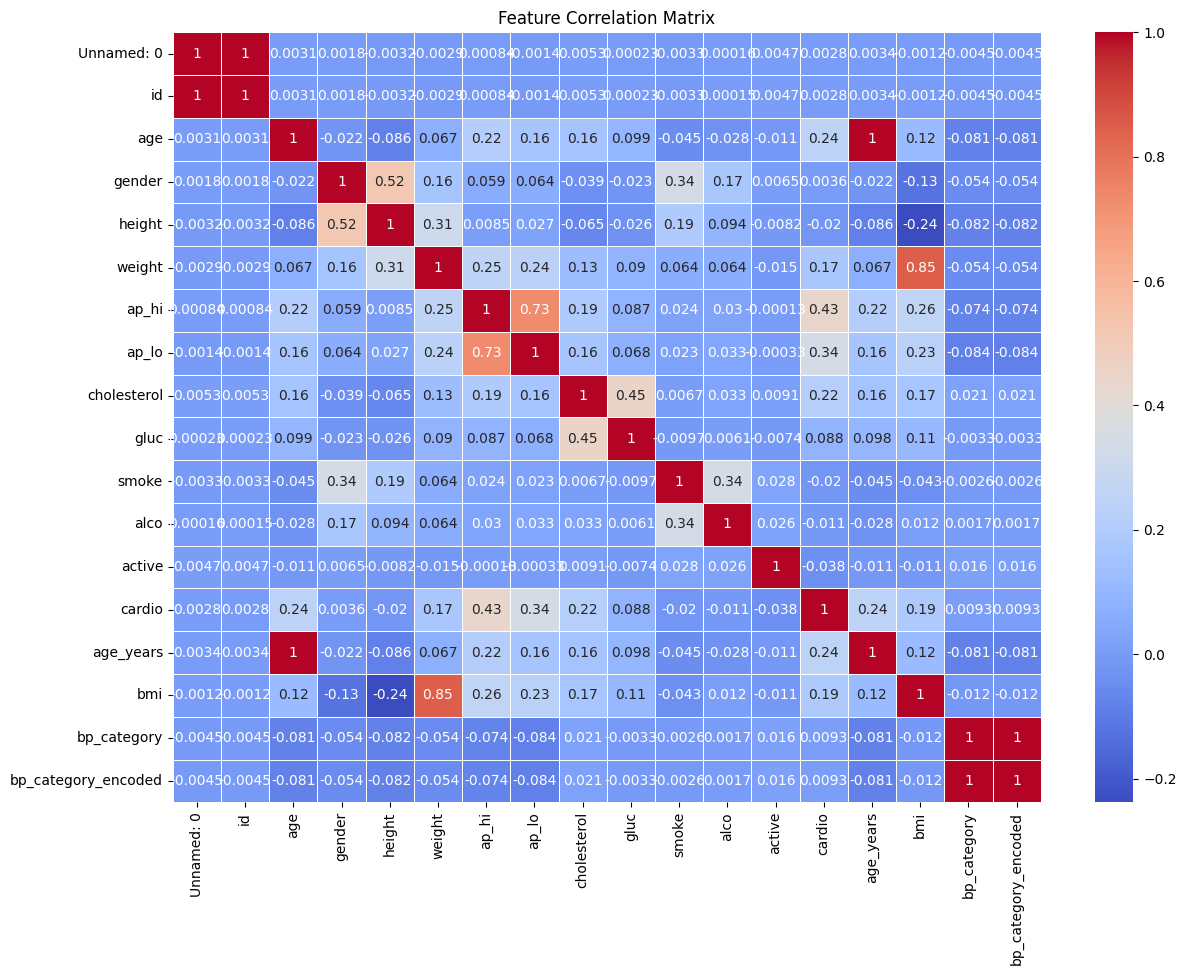

In [ ]:
# Correlation Analysis
data_corr = data.copy()

for column in data_corr.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data_corr[column] = le.fit_transform(data_corr[column])

correlation_matrix = data_corr.corr()
plt.figure(figsize=(14,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()